# CONTEÚDO DO FICHEIRO

**Ficheiro**: Neste ficheiro apresentamos um tratamento de dados simples (remoção de algumas colunas, tratamento de valores categóricos e tratamento da data da observação). Também apresentamos um conjunto de modelos aplicados ao dataset de treino e avaliamos a sua precisão e matriz de confusão.

# COMPETIÇÃO
O objetivo deste trabalho passa por desenvolver modelos de Machine Learning capaz de prever o fluxo de tráfego rodoviário, numa determinada hora, no Porto.
O modelo a desenvolver terá, na sua base, o tempo que se demora a percorrer as ruas da cidade do Porto num determinado ponto temporal (record_date); na temperatura, pressão atmosférica, humidade, precipitação e velocidade do vento, entre outras, que caracterizam um determinado ponto temporal.
Devem utilizar o modelo desenvolvido para prever, para cada registo do dataset de teste, o nível de trânsito correspondente.


**Resumo:** A partir do dataset de treino modelar o average speed diff de um carro segundo as condições presente nos restantes dados. O average speed diff pode ser None, Low, Medium, High, Very_high isto é, pode não haver trânsito (None) até haver muito trânsito (Very_high). De seguida, aplicar a modelação para determinar quais os valores de average speed diff para cada linha do dataset de teste e enviar uma submissão para determinar a acurácia. 

**Problema supervisionado de classificação**

## IMPORTS

In [45]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline

## DATASET
O dataset de treino é constituido pelo os seguintes parâmetros:
- **city_name** - nome da cidade em causa;
- **record_date** - o timestamp associado ao registo;
- **average_speed_diff** - a diferença de velocidade corresponde à diferença entre (1.) a velocidade máxima que os carros podem atingir em cenários sem trânsito e (2.) a velocidade que realmente se verifica. Quanto mais alto o valor, maior é a diferença entre o que se está a andar no momento e o que se deveria estar a andar sem trânsito, i.e., valores altos deste atributo implicam que se está a andar mais devagar;
- **average_free_flow_speed** - o valor médio da velocidade máxima que os carros podem atingir em cenários sem trânsito;
- **average_time_diff** - o valor médio da diferença do tempo que se demora a percorrer um determinado conjunto de ruas. Quanto mais alto o valor maior é a diferença entre o tempo que demora para se percorrer as ruas e o que se deveria demorar sem trânsito, i.e., valores altos implicam que se está a demorar mais tempo a atravessar o conjunto de ruas;
- **average_free_flow_time** - o valor médio do tempo que demora a percorrer um determinado conjunto de ruas quando não há trânsito;
- **luminosity** - o nível de luminosidade que se verificava na cidade do Porto;
- **average_temperature** - o valor médio da temperatura para o record_date na cidade do Porto;
- **average_atmosp_pressure** - o valor médio da pressão atmosférica para o record_date;
- **average_humidity** - o valor médio da humidade para o record_date;
- **average_wind_speed** - o valor médio da velocidade do vento para o record_date;
- **average_cloudiness** - o valor médio da percentagem de nuvens para o record_date;
- **average_precipitation** - o valor médio de precipitação para o record_date;
- **average_rain** - avaliação qualitativa da precipitação para o record_date.

In [46]:
traffic = pd.read_csv('training_data.csv')
test = pd.read_csv('test_data.csv')

In [47]:
traffic.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [48]:
traffic.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


## Vizualização dos dados

In [49]:
sns.set_theme(palette="pastel")

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='Count'>

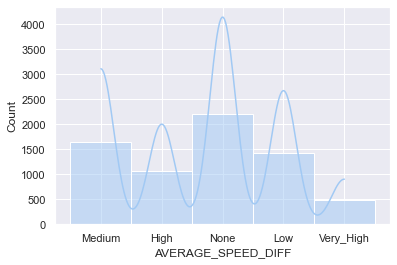

In [50]:
sns.histplot(traffic['AVERAGE_SPEED_DIFF'],kde=True)

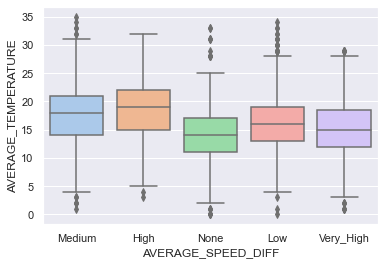

In [51]:
ax = sns.boxplot(x=traffic["AVERAGE_SPEED_DIFF"], y=traffic["AVERAGE_TEMPERATURE"])

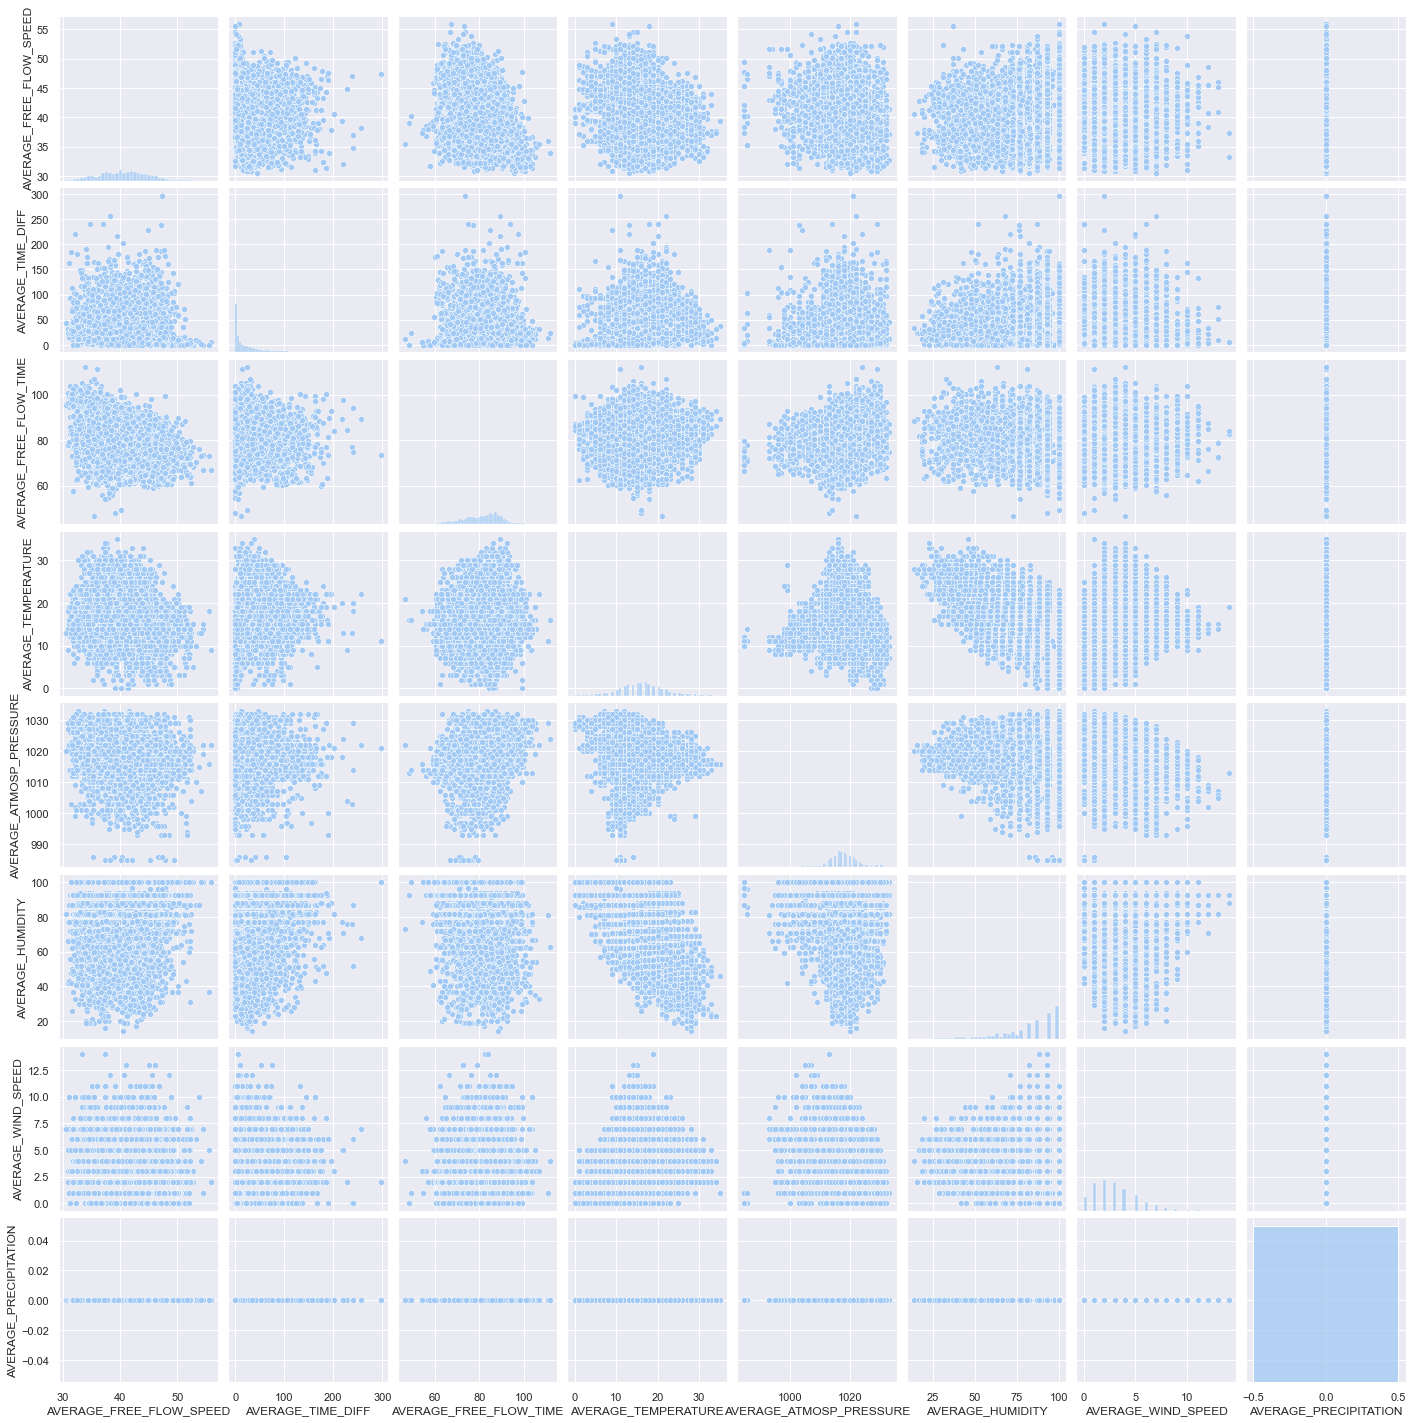

In [52]:
sns.pairplot(traffic)

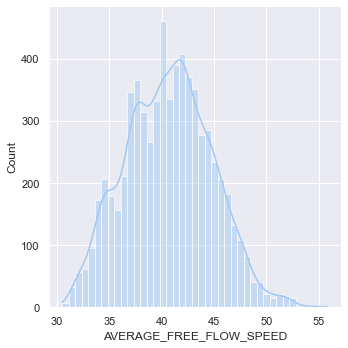

In [53]:
sns.displot(data=traffic, x="AVERAGE_FREE_FLOW_SPEED", kde=True)

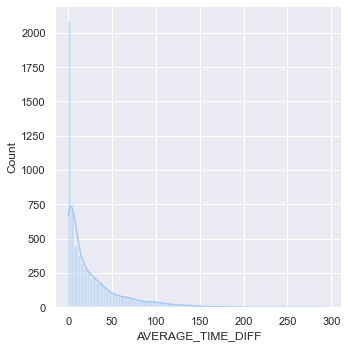

In [54]:
sns.displot(data=traffic, x="AVERAGE_TIME_DIFF", kde=True)

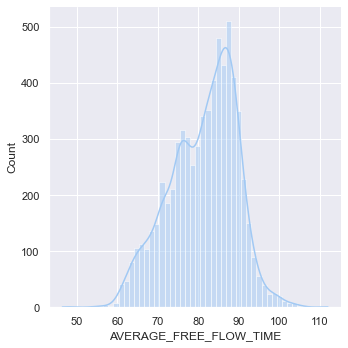

In [55]:
sns.displot(data=traffic, x="AVERAGE_FREE_FLOW_TIME", kde=True)

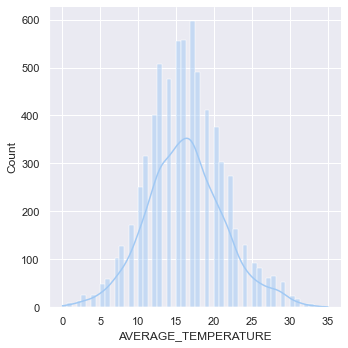

In [56]:
sns.displot(data=traffic, x="AVERAGE_TEMPERATURE", kde=True)

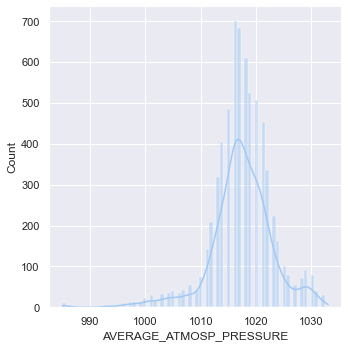

In [57]:
sns.displot(data=traffic, x="AVERAGE_ATMOSP_PRESSURE", kde=True)

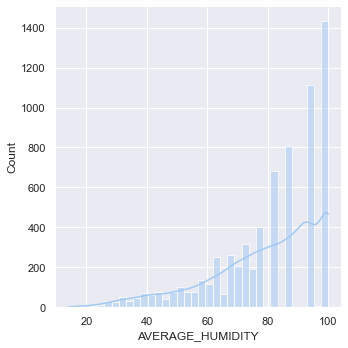

In [58]:
sns.displot(data=traffic, x="AVERAGE_HUMIDITY", kde=True)

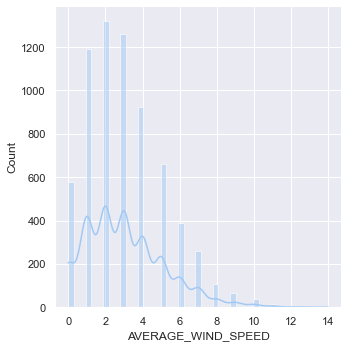

In [59]:
sns.displot(data=traffic,x="AVERAGE_WIND_SPEED",kde=True)

In [60]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [61]:
# None = 0, Low = 1, Medium = 2, High = 3, Very_High = 4
traffic['AVERAGE_SPEED_DIFF'].value_counts()

None         2200
Medium       1651
Low          1419
High         1063
Very_High     479
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [62]:
traffic['LUMINOSITY'].value_counts()

LIGHT        3293
DARK         3253
LOW_LIGHT     266
Name: LUMINOSITY, dtype: int64

In [63]:
traffic['AVERAGE_CLOUDINESS'].value_counts()

céu claro            1582
céu pouco nublado     516
nuvens dispersas      459
nuvens quebrados      448
algumas nuvens        422
nuvens quebradas      416
céu limpo             153
tempo nublado          67
nublado                67
Name: AVERAGE_CLOUDINESS, dtype: int64

In [64]:
traffic['AVERAGE_RAIN'].value_counts()

chuva fraca                    261
chuva moderada                 153
chuva leve                      45
aguaceiros fracos               38
chuva                           30
aguaceiros                      11
chuva forte                      8
trovoada com chuva leve          7
chuvisco fraco                   5
chuva de intensidade pesado      2
chuva de intensidade pesada      1
trovoada com chuva               1
chuvisco e chuva fraca           1
Name: AVERAGE_RAIN, dtype: int64

In [65]:
print(traffic[traffic.duplicated()]) # Verifica se e quais são os valores duplicados

Empty DataFrame
Columns: [city_name, record_date, AVERAGE_SPEED_DIFF, AVERAGE_FREE_FLOW_SPEED, AVERAGE_TIME_DIFF, AVERAGE_FREE_FLOW_TIME, LUMINOSITY, AVERAGE_TEMPERATURE, AVERAGE_ATMOSP_PRESSURE, AVERAGE_HUMIDITY, AVERAGE_WIND_SPEED, AVERAGE_CLOUDINESS, AVERAGE_PRECIPITATION, AVERAGE_RAIN]
Index: []


In [66]:
traffic.isna().any() # Verifica se há valores nulos no dataset

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
dtype: bool

In [67]:
print(traffic.isna().sum()) # Contagem dos valores em falta do dataset 

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


## FASE 1
**Tratamento dos dados**
- o city_name pode ser eliminado.
- o record_date pode ser dividido em 3 colunas (hora, dia e mes). 
- O average_speed_diff devemos passar para do tipo int (None = 0, Low = 1, Medium = 2, High = 3, Very_High = 4)
- a lumninosity pode ser passada para o tipo int (Dark = 0, Low_Light = 1, Light = 2)
- cloudiness (ceu limpo/claro = 0, nuvens dispersas/algumas nuvens/nuvens quebradas/dos/ceu pouco nublado = 1, tempo nublado/nublado = 2) - **extropolação devido a valores nulos**
- AVERAGE_PRECIPITATION pode ser eliminado
- AVERAGE_RAIN pode ser eliminado devido a falta de dados.

### Remoção de colunas redundantes

In [68]:
# DROP  -> colunas city_name, average_precipitation, average_rain
traffic = traffic.drop(['city_name'], axis=1)
traffic = traffic.drop(['AVERAGE_PRECIPITATION'], axis=1)
traffic = traffic.drop(['AVERAGE_CLOUDINESS'], axis=1)
traffic = traffic.drop(['AVERAGE_RAIN'], axis=1)

test = test.drop(['city_name'], axis=1)
test = test.drop(['AVERAGE_PRECIPITATION'], axis=1)
test = test.drop(['AVERAGE_CLOUDINESS'], axis=1)
test = test.drop(['AVERAGE_RAIN'], axis=1)

### Transformação de valores categóricos

In [69]:
#tratamento de average_speed_diff, luminosity
traffic["AVERAGE_SPEED_DIFF"] = traffic['AVERAGE_SPEED_DIFF'].replace({'None' : 0, 'Low' : 1, 'Medium' : 2, 'High' : 3, 'Very_High' : 4}).astype(int)
traffic["LUMINOSITY"] = traffic['LUMINOSITY'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)

test["LUMINOSITY"] = test['LUMINOSITY'].replace({'DARK' : 0, 'LOW_LIGHT' : 1, 'LIGHT' : 2}).astype(int)

traffic.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED
0,2019-08-29 07:00:00,2,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0
1,2018-08-10 14:00:00,3,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0
2,2019-09-01 16:00:00,3,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0
3,2019-02-26 11:00:00,3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0
4,2019-06-06 12:00:00,2,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0


### Criação de Features - Data da observação

In [70]:
#tratamento da coluna record_date
traffic.record_date = pd.to_datetime(traffic.record_date)
traffic.info()

test.record_date = pd.to_datetime(test.record_date)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   record_date              6812 non-null   datetime64[ns]
 1   AVERAGE_SPEED_DIFF       6812 non-null   int32         
 2   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 3   AVERAGE_TIME_DIFF        6812 non-null   float64       
 4   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 5   LUMINOSITY               6812 non-null   int32         
 6   AVERAGE_TEMPERATURE      6812 non-null   float64       
 7   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 8   AVERAGE_HUMIDITY         6812 non-null   float64       
 9   AVERAGE_WIND_SPEED       6812 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(2)
memory usage: 479.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (to

In [71]:
#divisão da coluna record_date em 3 colunas diferentes
traffic['Month'] = traffic.record_date.dt.month
traffic['Hour'] = traffic.record_date.dt.hour
traffic['Day'] = traffic.record_date.dt.day_name()
traffic['Day'] = traffic['Day'].replace({'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5,'Friday' : 6,'Saturday' : 7}).astype(int)
traffic.head() #colocação da data emj formato por celula
traffic = traffic.drop(['record_date'], axis=1)
#traffic

test['Month'] = test.record_date.dt.month
test['Hour'] = test.record_date.dt.hour
test['Day'] = test.record_date.dt.day_name()
test['Day'] = test['Day'].replace({'Sunday' : 1, 'Monday' : 2, 'Tuesday' : 3, 'Wednesday' : 4, 'Thursday' : 5,'Friday' : 6,'Saturday' : 7}).astype(int)
test.head() #colocação da data emj formato por celula
test = test.drop(['record_date'], axis=1)
#test

<AxesSubplot:>

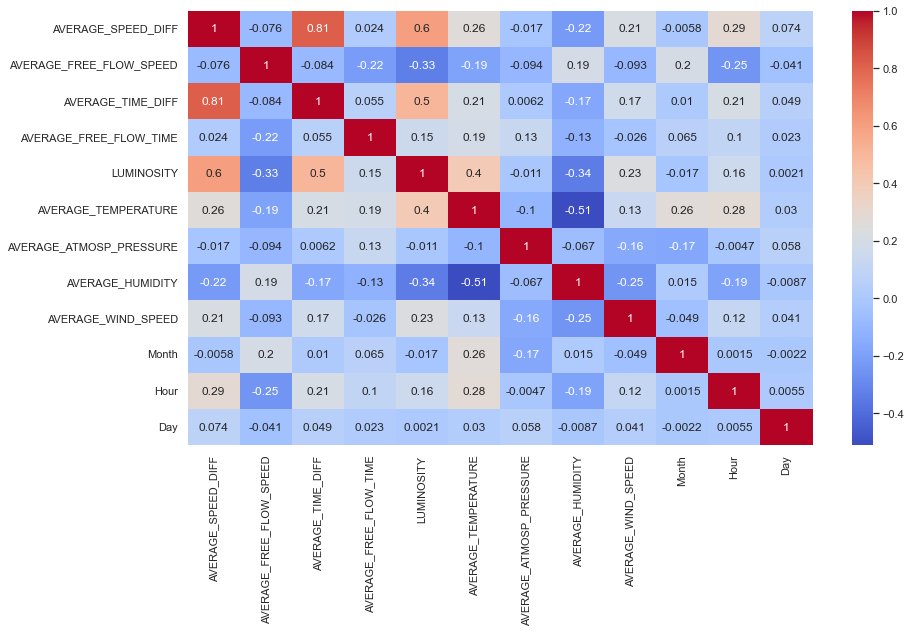

In [72]:
plt.subplots(figsize=(14,8))
sns.heatmap(traffic.corr(), annot = True, cmap='coolwarm')

## FASE 2
**Criação do modelo**

In [73]:
#divisão do target
x = traffic.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y = traffic['AVERAGE_SPEED_DIFF']

In [74]:
x

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,Month,Hour,Day
0,41.5,11.5,71.4,2,15.0,1019.0,100.0,3.0,8,7,5
1,41.7,48.3,87.4,2,21.0,1021.0,53.0,5.0,8,14,6
2,38.6,38.4,85.2,2,26.0,1014.0,61.0,4.0,9,16,1
3,37.4,61.0,94.1,2,18.0,1025.0,48.0,4.0,2,11,3
4,41.6,50.4,77.0,2,15.0,1008.0,82.0,10.0,6,12,5
...,...,...,...,...,...,...,...,...,...,...,...
6807,41.2,3.7,86.9,2,9.0,1030.0,71.0,4.0,2,9,7
6808,38.9,51.9,76.9,2,17.0,1020.0,63.0,6.0,6,18,7
6809,39.6,0.0,89.1,0,15.0,1020.0,39.0,4.0,10,4,3
6810,41.6,0.0,85.5,0,8.0,1018.0,81.0,1.0,1,1,4


In [75]:
y

0       2
1       3
2       3
3       3
4       2
       ..
6807    1
6808    2
6809    0
6810    0
6811    2
Name: AVERAGE_SPEED_DIFF, Length: 6812, dtype: int32

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.25, random_state=2021)

### DecisionTree

In [77]:
#criação de uma arvore de decião 73%
clf = DecisionTreeClassifier(random_state=2021)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       568
           1       0.57      0.62      0.59       332
           2       0.68      0.63      0.65       403
           3       0.64      0.73      0.68       274
           4       0.83      0.76      0.80       126

    accuracy                           0.72      1703
   macro avg       0.72      0.71      0.71      1703
weighted avg       0.73      0.72      0.72      1703



<function matplotlib.pyplot.show(close=None, block=None)>

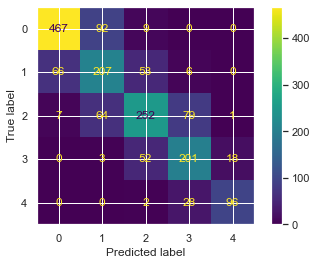

In [78]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### RandomForest

In [79]:
# Random Forest ginny vs entropy 84%
clf = RandomForestClassifier(n_estimators=500, random_state=2021, criterion='entropy')
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       568
           1       0.66      0.69      0.68       332
           2       0.78      0.74      0.76       403
           3       0.74      0.79      0.76       274
           4       0.94      0.76      0.84       126

    accuracy                           0.79      1703
   macro avg       0.80      0.78      0.79      1703
weighted avg       0.80      0.79      0.79      1703



<function matplotlib.pyplot.show(close=None, block=None)>

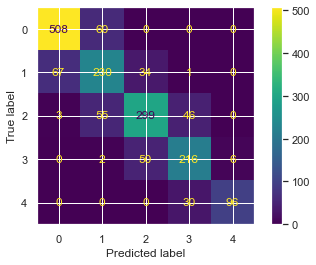

In [80]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### BaggingClassifier

In [81]:
# Bagging normal 72 %
clf = BaggingClassifier(KNeighborsClassifier(), random_state=2021, max_samples=0.5, max_features=0.5)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       568
           1       0.67      0.43      0.52       332
           2       0.70      0.73      0.71       403
           3       0.70      0.69      0.69       274
           4       0.89      0.60      0.72       126

    accuracy                           0.73      1703
   macro avg       0.74      0.68      0.70      1703
weighted avg       0.73      0.73      0.72      1703



<function matplotlib.pyplot.show(close=None, block=None)>

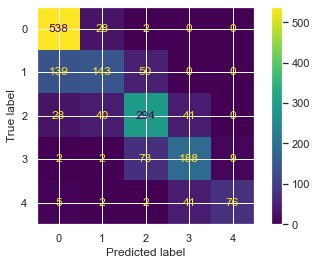

In [82]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### ExtraTreesClassifier

In [83]:
clf = ExtraTreesClassifier(n_estimators=100, random_state=2021)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       568
           1       0.69      0.63      0.66       332
           2       0.76      0.76      0.76       403
           3       0.72      0.77      0.75       274
           4       0.93      0.71      0.80       126

    accuracy                           0.78      1703
   macro avg       0.79      0.76      0.77      1703
weighted avg       0.78      0.78      0.78      1703



<function matplotlib.pyplot.show(close=None, block=None)>

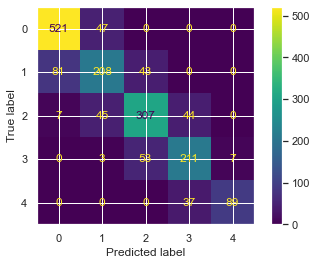

In [84]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### AdaBoostClassifier

In [85]:
clf = AdaBoostClassifier(n_estimators=100, random_state=2021)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       568
           1       0.37      0.61      0.46       332
           2       0.80      0.36      0.50       403
           3       0.53      0.86      0.65       274
           4       0.84      0.25      0.39       126

    accuracy                           0.57      1703
   macro avg       0.65      0.54      0.53      1703
weighted avg       0.65      0.57      0.56      1703



<function matplotlib.pyplot.show(close=None, block=None)>

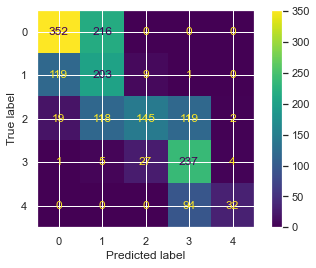

In [86]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

### GradientBoostingClassifier

In [87]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88       568
           1       0.64      0.68      0.66       332
           2       0.48      0.74      0.59       403
           3       0.65      0.37      0.47       274
           4       0.00      0.00      0.00       126

    accuracy                           0.66      1703
   macro avg       0.53      0.54      0.52      1703
weighted avg       0.64      0.66      0.64      1703



C:\Anaconda\anaconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\anaconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\anaconda3\envs\DAA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<function matplotlib.pyplot.show(close=None, block=None)>

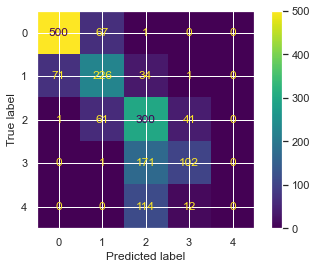

In [88]:
print(classification_report(Y_test,predictions))
plot_confusion_matrix(clf,X_test,Y_test)
plt.show

## FASE 3
**Passagem dos valores para ficheiro CSV**

In [89]:
# acrescentar headers
#submission = pd.DataFrame(predictions, columns = ["Speed_Diff"])
#submission.insert(0, "RowId", range(1,1501), True)

#transformação dos valores para formato escrito
#submission['Speed_Diff']= submission['Speed_Diff'].replace({0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'})

#passagem para ficheiro csv
#submission.to_csv('submission5.csv', index=False)

#submission